##What is Sentiment Analysis?

Sentiment analysis (also known as opinion mining) is one of the many applications of Natural Language Processing. It is a set of methods and techniques used for extracting subjective information from text or speech, such as opinions or attitudes. In simple terms, it involves classifying a piece of text as positive, negative or neutral.

### Problem Statement

The problem statement is as follows:

The objective of this task is to detect hate speech in tweets. For the sake of simplicity, we say a tweet contains hate speech if it has a racist or sexist sentiment associated with it. So, the task is to classify racist or sexist tweets from other tweets.
Formally, given a training sample of tweets and labels, where label ‘1’ denotes the tweet is racist/sexist and label ‘0’ denotes the tweet is not racist/sexist, your objective is to predict the labels on the labels on the given test dataset.

### Importing Required Libraries And Importing Dataset

In [1]:
! pip install plotly


[notice] A new release of pip available: 22.2.2 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
pip install seaborn


[notice] A new release of pip available: 22.2.2 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import re
import nltk
import string
import numpy as np
import warnings
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as pl
%matplotlib inline
pd.set_option("display.max_colwidth",200)


In [66]:
#importing the data

train_data = pd.read_csv("C:/Users/Lenovo/Desktop/work/NLP_sentiment_Analysis/NLP_Project_Twitter_Sentiment_Analysis/data/train_tweets_data.csv")
test_data = pd.read_csv("C:/Users/Lenovo/Desktop/work/NLP_sentiment_Analysis/NLP_Project_Twitter_Sentiment_Analysis/data/test_tweets_data.csv")

### Concatinate test data and train data

In [67]:
df = pd.concat([train_data,test_data],axis=0,ignore_index=True)

In [6]:
df

,id,label,tweet
0,1,0.0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run
1,2,0.0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked
2,3,0.0,bihday your majesty
3,4,0.0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦
4,5,0.0,factsguide: society now #motivation
...,...,...,...
49154,49155,NaN,thought factory: left-right polarisation! #trump #uselections2016 #leadership #politics #brexit #blm &gt;3
49155,49156,NaN,feeling like a mermaid ð #hairflip #neverready #formal #wedding #gown #dresses #mermaid â¦
49156,49157,NaN,"#hillary #campaigned today in #ohio((omg)) &amp; used words like ""assets&amp;liability"" never once did #clinton say thee(word) #radicalization"
49157,49158,NaN,"happy, at work conference: right mindset leads to culture-of-development organizations #work #mindset"


In [7]:
df.shape

(49159, 3)

### Data Inspection


Text is a highly unstructured form of data, various types of noise are present in it and the data is not readily analyzable without any pre-processing. The entire process of cleaning and standardization of text, making it noise-free and ready for analysis is known as text preprocessing. 

We will divide it into 2 parts:
* Data Inspection
* Data Cleaning

In [8]:
train_data

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run
1,2,0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦
4,5,0,factsguide: society now #motivation
...,...,...,...
31957,31958,0,ate @user isz that youuu?ðððððððððâ¤ï¸
31958,31959,0,to see nina turner on the airwaves trying to wrap herself in the mantle of a genuine hero like shirley chisolm. #shame #imwithher
31959,31960,0,listening to sad songs on a monday morning otw to work is sad
31960,31961,1,"@user #sikh #temple vandalised in in #calgary, #wso condemns act"


In [9]:
test_data

,id,tweet
0,31963,#studiolife #aislife #requires #passion #dedication #willpower to find #newmaterialsâ¦
1,31964,@user #white #supremacists want everyone to see the new â #birdsâ #movie â and hereâs why
2,31965,safe ways to heal your #acne!! #altwaystoheal #healthy #healing!!
3,31966,"is the hp and the cursed child book up for reservations already? if yes, where? if no, when? ððð #harrypotter #pottermore #favorite"
4,31967,"3rd #bihday to my amazing, hilarious #nephew eli ahmir! uncle dave loves you and missesâ¦"
...,...,...
17192,49155,thought factory: left-right polarisation! #trump #uselections2016 #leadership #politics #brexit #blm &gt;3
17193,49156,feeling like a mermaid ð #hairflip #neverready #formal #wedding #gown #dresses #mermaid â¦
17194,49157,"#hillary #campaigned today in #ohio((omg)) &amp; used words like ""assets&amp;liability"" never once did #clinton say thee(word) #radicalization"
17195,49158,"happy, at work conference: right mindset leads to culture-of-development organizations #work #mindset"


In [10]:
print(train_data.shape)
print(test_data.shape)

(31962, 3)
(17197, 2)


In [11]:
train_data[train_data["label"]==0].head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run
1,2,0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦
4,5,0,factsguide: society now #motivation


In [12]:
train_data[train_data["label"]==1].head()

,id,label,tweet
13,14,1,@user #cnn calls #michigan middle school 'build the wall' chant '' #tcot
14,15,1,no comment! in #australia #opkillingbay #seashepherd #helpcovedolphins #thecove #helpcovedolphins
17,18,1,retweet if you agree!
23,24,1,@user @user lumpy says i am a . prove it lumpy.
34,35,1,it's unbelievable that in the 21st century we'd need something like this. again. #neverump #xenophobia


In [13]:

train_data["label"].value_counts()

label
0    29720
1     2242
Name: count, dtype: int64

In the train dataset, we have 2,242 (~7%) tweets labeled as racist or sexist, and 29,720 (~93%) tweets labeled as non racist/sexist. So, it is an imbalanced dataset.



In [14]:
#checking null values
train_data.isnull().sum()

id       0
label    0
tweet    0
dtype: int64

Checking Length of Each Datasample

In [15]:
length=train_data["length"]=train_data["tweet"].apply(lambda x:len(x))

In [16]:
train_data

,id,label,tweet,length
0,1,0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run,102
1,2,0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked,122
2,3,0,bihday your majesty,21
3,4,0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦,86
4,5,0,factsguide: society now #motivation,39
...,...,...,...,...
31957,31958,0,ate @user isz that youuu?ðððððððððâ¤ï¸,68
31958,31959,0,to see nina turner on the airwaves trying to wrap herself in the mantle of a genuine hero like shirley chisolm. #shame #imwithher,131
31959,31960,0,listening to sad songs on a monday morning otw to work is sad,63
31960,31961,1,"@user #sikh #temple vandalised in in #calgary, #wso condemns act",67


In [17]:
length

0        102
1        122
2         21
3         86
4         39
        ... 
31957     68
31958    131
31959     63
31960     67
31961     32
Name: tweet, Length: 31962, dtype: int64

### Data Cleaning In NLP

1. converting text into lower case

In [68]:

df['tweet'].apply(lambda x: " ".join(x.lower()  for x in x.split()))
df

,id,label,tweet
0,1,0.0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run
1,2,0.0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked
2,3,0.0,bihday your majesty
3,4,0.0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦
4,5,0.0,factsguide: society now #motivation
...,...,...,...
49154,49155,NaN,thought factory: left-right polarisation! #trump #uselections2016 #leadership #politics #brexit #blm &gt;3
49155,49156,NaN,feeling like a mermaid ð #hairflip #neverready #formal #wedding #gown #dresses #mermaid â¦
49156,49157,NaN,"#hillary #campaigned today in #ohio((omg)) &amp; used words like ""assets&amp;liability"" never once did #clinton say thee(word) #radicalization"
49157,49158,NaN,"happy, at work conference: right mindset leads to culture-of-development organizations #work #mindset"


2. Punctuation Removal from tweet feature

In [72]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [73]:
df["tweet"]= df["tweet"].apply(lambda x:"".join(i for i in x if i not in string.punctuation ))

In [74]:
df

,id,label,tweet
0,1,0.0,when a father is dysfunctional and is so selfish he drags his kids into his dysfunction run
1,2,0.0,thanks for lyft credit i cant use cause they dont offer wheelchair vans in pdx disapointed getthanked
2,3,0.0,bihday your majesty
3,4,0.0,model i love u take with u all the time in urð± ðððð ð¦ð¦ð¦
4,5,0.0,factsguide society now motivation
...,...,...,...
49154,49155,NaN,thought factory leftright polarisation trump uselections2016 leadership politics brexit blm gt3
49155,49156,NaN,feeling like a mermaid ð hairflip neverready formal wedding gown dresses mermaid â¦
49156,49157,NaN,hillary campaigned today in ohioomg amp used words like assetsampliability never once did clinton say theeword radicalization
49157,49158,NaN,happy at work conference right mindset leads to cultureofdevelopment organizations work mindset


3. Stop Words Removal from dataset

In [22]:
# nltk.download('stopwords') 



In [23]:
allstopwords1=pd.read_csv("C:/Users/Lenovo/Desktop/work/NLP_sentiment_Analysis/NLP_Project_Twitter_Sentiment_Analysis/data/allstopwords_Submission.csv")

In [24]:
allstopwords = allstopwords1["0"].tolist()

In [25]:
# from nltk.corpus import stopwords
# allstopwords = stopwords.words('english')

In [26]:
# x = pd.DataFrame(train_data1)

In [27]:
# cat =x.describe(include = "O").columns

In [28]:
# cat

In [61]:
df["tweet"]=df["tweet"].apply(lambda x: " ".join(i for i in x.split() if i not in allstopwords))

In [30]:
# nltk.download('stopwords') 
# from nltk.corpus import stopwords
# allstopwords = stopwords.words('english')
# df_train=train_data.tweet.apply(lambda x: " ".join(i for i in x.split() if i not in allstopwords))

4.Spelling Correction

In [31]:
# #Install textblob library 
# ! pip install textblob 
# from textblob import TextBlob

In [32]:
# df.apply(lambda x: str(TextBlob(x).correct()))

5. Removing Tweeter Handels

In [69]:
def remove_pattern(input_text, pattern):
    r = re.findall(pattern, input_text)
    for i in r:
        input_text =  re.sub(i,"", input_text)
    return input_text    

In [70]:
df["tweet"]=np.vectorize(remove_pattern)(df["tweet"], "@[\w]*")

In [63]:
df['tweet'] = np.vectorize(remove_pattern)(df['tweet'], "@[w]*")

In [71]:
df

,id,label,tweet
0,1,0.0,when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run
1,2,0.0,thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked
2,3,0.0,bihday your majesty
3,4,0.0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦
4,5,0.0,factsguide: society now #motivation
...,...,...,...
49154,49155,NaN,thought factory: left-right polarisation! #trump #uselections2016 #leadership #politics #brexit #blm &gt;3
49155,49156,NaN,feeling like a mermaid ð #hairflip #neverready #formal #wedding #gown #dresses #mermaid â¦
49156,49157,NaN,"#hillary #campaigned today in #ohio((omg)) &amp; used words like ""assets&amp;liability"" never once did #clinton say thee(word) #radicalization"
49157,49158,NaN,"happy, at work conference: right mindset leads to culture-of-development organizations #work #mindset"


6. Removing shortWords from dataframe

In [36]:
df["tweet"] = df["tweet"].apply(lambda x: " ".join(i for i in x.split()if len(i)>3))

In [37]:
df

,id,label,tweet
0,1,0.0,user father dysfunctional selfish drags kids dysfunction
1,2,0.0,user user thanks lyft credit cant cause dont offer wheelchair vans disapointed getthanked
2,3,0.0,bihday majesty
3,4,0.0,model love take time urð± ðððð ð¦ð¦ð¦
4,5,0.0,factsguide society motivation
...,...,...,...
49154,49155,NaN,thought factory leftright polarisation trump uselections2016 leadership politics brexit
49155,49156,NaN,feeling like mermaid ð hairflip neverready formal wedding gown dresses mermaid
49156,49157,NaN,hillary campaigned today ohioomg used words like assetsampliability never clinton theeword radicalization
49157,49158,NaN,happy work conference right mindset leads cultureofdevelopment organizations work mindset


7. Lemmatization

In [38]:
# # # Download Wordnet through NLTK in python console:
# import nltk
# nltk.download('wordnet')
# nltk.download('omw-1.4')

In [39]:
# import nltk
# from nltk.stem import WordNetLemmatizer 

# # Init the Wordnet Lemmatizer
# lemmatizer = WordNetLemmatizer()
# import textblob
# from textblob import Word
# df2["tweet"]=df2["tweet"].apply(lambda x: ",".join([Word(word).lemmatize() for word in x.split()]))

In [40]:
df3= pd.read_csv("C:/Users/Lenovo/Desktop/work/NLP_sentiment_Analysis/NLP_Project_Twitter_Sentiment_Analysis/data/lammi1.csv")

In [41]:
df3

,id,label,tweet
0,1,0.0,"['user', 'father', 'dysfunctional', 'selfish', 'drag', 'kid', 'dysfunction']"
1,2,0.0,"['user', 'user', 'thanks', 'lyft', 'credit', 'cant', 'cause', 'dont', 'offer', 'wheelchair', 'van', 'disapointed', 'getthanked']"
2,3,0.0,"['bihday', 'majesty']"
3,4,0.0,"['model', 'love', 'take', 'time', 'urð\x9f\x93±', 'ð\x9f\x98\x99ð\x9f\x98\x8eð\x9f\x91\x84ð\x9f\x91', 'ð\x9f\x92¦ð\x9f\x92¦ð\x9f\x92¦']"
4,5,0.0,"['factsguide', 'society', 'motivation']"
...,...,...,...
49154,49155,NaN,"['thought', 'factory', 'leftright', 'polarisation', 'trump', 'uselections2016', 'leadership', 'politics', 'brexit']"
49155,49156,NaN,"['feeling', 'like', 'mermaid', 'ð\x9f\x98\x98', 'hairflip', 'neverready', 'formal', 'wedding', 'gown', 'dress', 'mermaid']"
49156,49157,NaN,"['hillary', 'campaigned', 'today', 'ohioomg', 'used', 'word', 'like', 'assetsampliability', 'never', 'clinton', 'theeword', 'radicalization']"
49157,49158,NaN,"['happy', 'work', 'conference', 'right', 'mindset', 'lead', 'cultureofdevelopment', 'organization', 'work', 'mindset']"


5. Tokenization on dataset

In [42]:
# import nltk
# nltk.download('punkt')
# nltk.word_tokenize(str(df))
# #punkt=pd.DataFrame(punkt)

In [43]:
df1= pd.read_csv("C:/Users/Lenovo/Desktop/work/NLP_sentiment_Analysis/NLP_Project_Twitter_Sentiment_Analysis/data/token.csv")
# punkt = punkt["0"].tolist()

# punkt=pd.DataFrame(punkt)

In [44]:
df1

,id,label,tweet
0,1,0.0,"['user', 'father', 'dysfunctional', 'selfish', 'drag', 'kid', 'dysfunction']"
1,2,0.0,"['user', 'user', 'thanks', 'lyft', 'credit', 'cant', 'cause', 'dont', 'offer', 'wheelchair', 'van', 'disapointed', 'getthanked']"
2,3,0.0,"['bihday', 'majesty']"
3,4,0.0,"['model', 'love', 'take', 'time', 'urð\x9f\x93±', 'ð\x9f\x98\x99ð\x9f\x98\x8eð\x9f\x91\x84ð\x9f\x91', 'ð\x9f\x92¦ð\x9f\x92¦ð\x9f\x92¦']"
4,5,0.0,"['factsguide', 'society', 'motivation']"
...,...,...,...
49154,49155,NaN,"['thought', 'factory', 'leftright', 'polarisation', 'trump', 'uselections2016', 'leadership', 'politics', 'brexit']"
49155,49156,NaN,"['feeling', 'like', 'mermaid', 'ð\x9f\x98\x98', 'hairflip', 'neverready', 'formal', 'wedding', 'gown', 'dress', 'mermaid']"
49156,49157,NaN,"['hillary', 'campaigned', 'today', 'ohioomg', 'used', 'word', 'like', 'assetsampliability', 'never', 'clinton', 'theeword', 'radicalization']"
49157,49158,NaN,"['happy', 'work', 'conference', 'right', 'mindset', 'lead', 'cultureofdevelopment', 'organization', 'work', 'mindset']"


In [49]:
# remove special characters, numbers, punctuations
df['tweet'] = df['tweet'].str.replace("[^a-zA-Z#]", " ")

In [50]:
df

,id,label,tweet
0,1,0.0,user father dysfunctional selfish drags kids dysfunction
1,2,0.0,user user thanks lyft credit cant cause dont offer wheelchair vans disapointed getthanked
2,3,0.0,bihday majesty
3,4,0.0,model love take time urð± ðððð ð¦ð¦ð¦
4,5,0.0,factsguide society motivation
...,...,...,...
49154,49155,NaN,thought factory leftright polarisation trump uselections2016 leadership politics brexit
49155,49156,NaN,feeling like mermaid ð hairflip neverready formal wedding gown dresses mermaid
49156,49157,NaN,hillary campaigned today ohioomg used words like assetsampliability never clinton theeword radicalization
49157,49158,NaN,happy work conference right mindset leads cultureofdevelopment organizations work mindset


In [48]:
from nltk.stem.porter import *
stemmer = PorterStemmer()

df0 = df.tweet.apply(lambda x: [stemmer.stem(i) for i in x]) # stemming
df0.head()

0                                   [u, s, e, r,  , f, a, t, h, e, r,  , d, y, s, f, u, n, c, t, i, o, n, a, l,  , s, e, l, f, i, s, h,  , d, r, a, g, s,  , k, i, d, s,  , d, y, s, f, u, n, c, t, i, o, n]
1    [u, s, e, r,  , u, s, e, r,  , t, h, a, n, k, s,  , l, y, f, t,  , c, r, e, d, i, t,  , c, a, n, t,  , c, a, u, s, e,  , d, o, n, t,  , o, f, f, e, r,  , w, h, e, e, l, c, h, a, i, r,  , v, a, n, ...
2                                                                                                                                                                 [b, i, h, d, a, y,  , m, a, j, e, s, t, y]
3                                   [m, o, d, e, l,  , l, o, v, e,  , t, a, k, e,  , t, i, m, e,  , u, r, ð, , , ±,  , ð, , , , ð, , , , ð, , , , ð, , ,  , ð, , , ¦, ð, , , ¦, ð, , , ¦]
4                                                                                                                    [f, a, c, t, s, g, u, i, d, e,  , s, o, c, i, e, t, y,  , m, o,

### EDA And Visulization 

1. Wordcloud

In [45]:
pip install wordcloud


     ------------------------------------ 152.1/152.1 kB 252.0 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.2 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


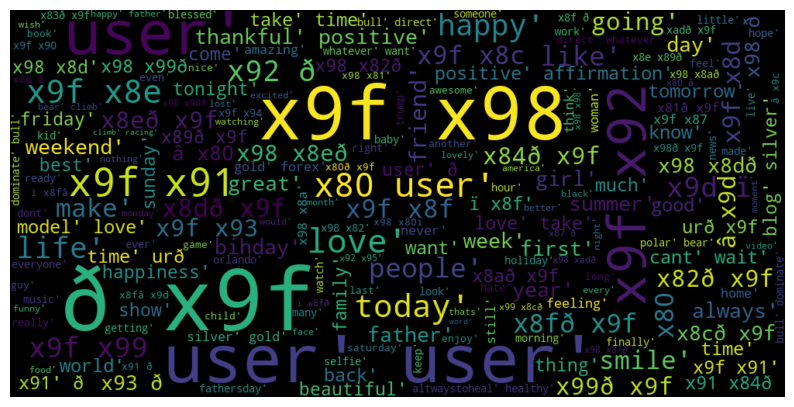

In [65]:
import matplotlib.pyplot as plt
all_words = ' '.join([text for text in df1['tweet']])
from wordcloud import WordCloud
wordcloud = WordCloud(width=1000, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()